In [7]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.integrate as integrate
from scipy.constants import h, c, k
import os
from jupyterthemes import jtplot

In [8]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

# Individual task

In [3]:
def B(l, T):
    return (2*h*c*c)/(l**5 * (np.exp((h*c)/(l*k*T)) - 1))

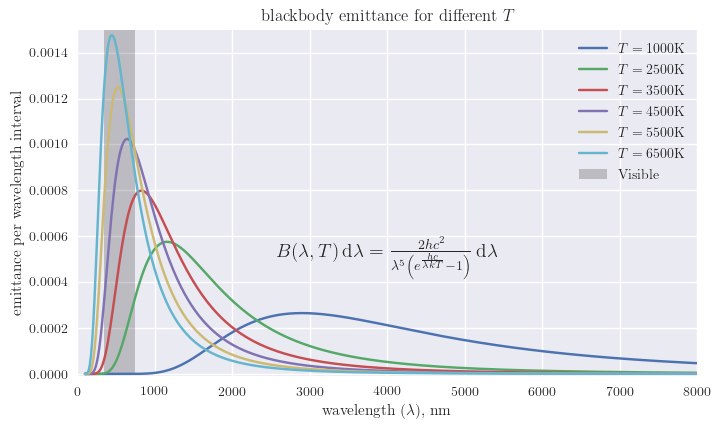

In [5]:
l = np.linspace(100, 8000, 513) * 1e-9
dl = l[1] - l[0]
T = [1000, 2500, 3500, 4500, 5500, 6500]

for t in T:
    bl = B(l,t)
    ba = integrate.romb(bl, dl)
    b = bl/ba
    mp.plot(l*1e9, b*1e-9, label='$T = {}$K'.format(t))
mp.fill_betweenx(np.linspace(0, 0.0015), 750, 350, facecolor='k', alpha=0.2, label='Visible')
mp.xlabel('wavelength ($\lambda$), nm')
mp.ylabel('emittance per wavelength interval')
mp.xlim(l[0]*1e9 - 1e2, l[-1]*1e9)
mp.ylim(-0.00001, 0.0015)
mp.title('blackbody emittance for different $T$')
mp.legend()
mp.text(4000, 0.0005, 
        r'$B(\lambda, T) \dd{\lambda} = \frac{2hc^2}{\lambda^5 \qty(e^{\frac{hc}{\lambda kT}} - 1)} \dd{\lambda}$', 
        fontsize=14, horizontalalignment='center', verticalalignment='center')
mp.savefig('emittance.png', dpi=300, bbox_inches='tight')
mp.show()

# Group task

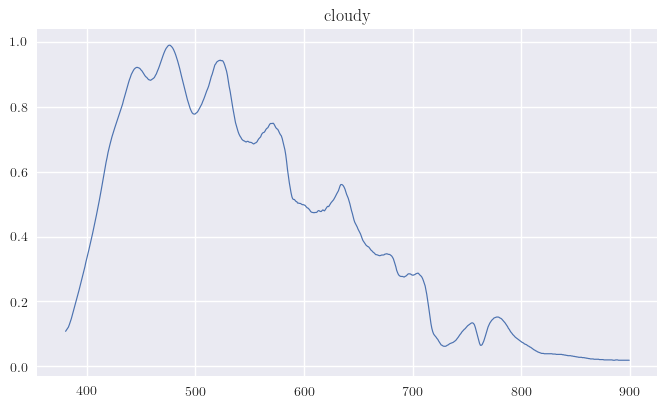

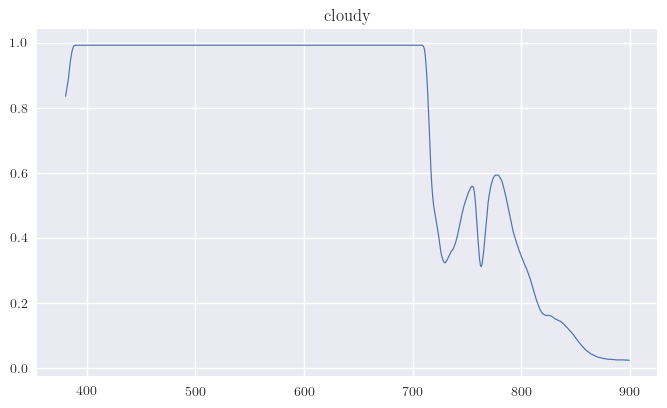

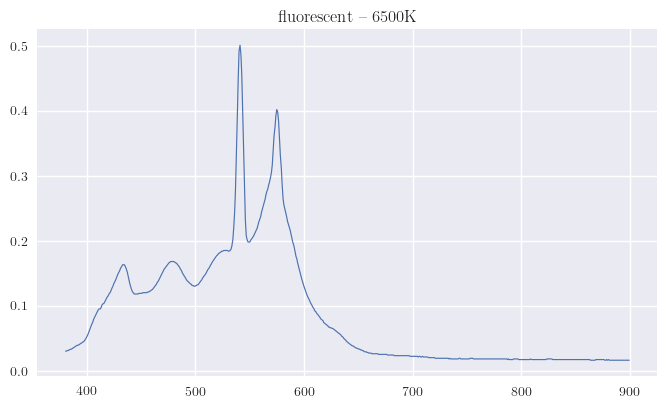

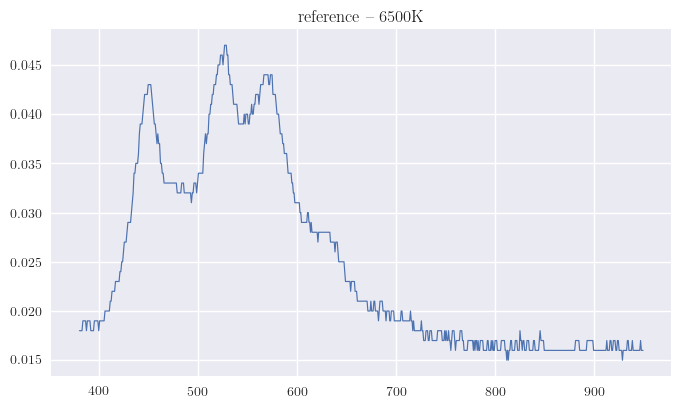

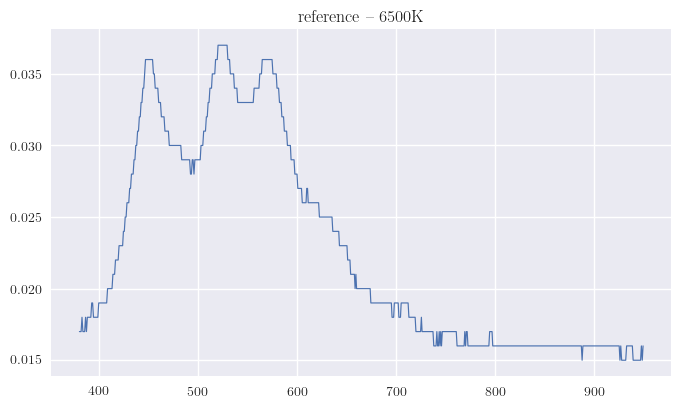

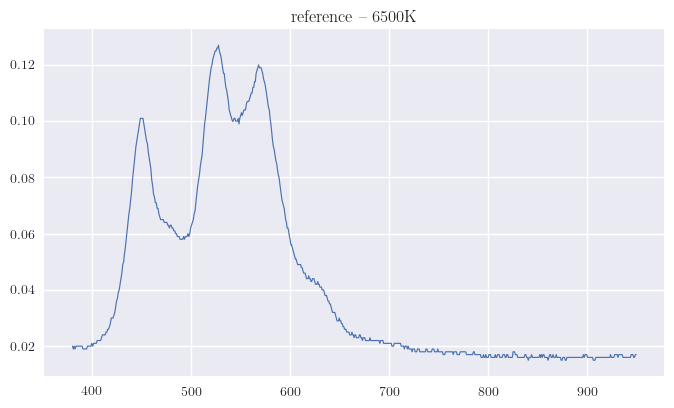

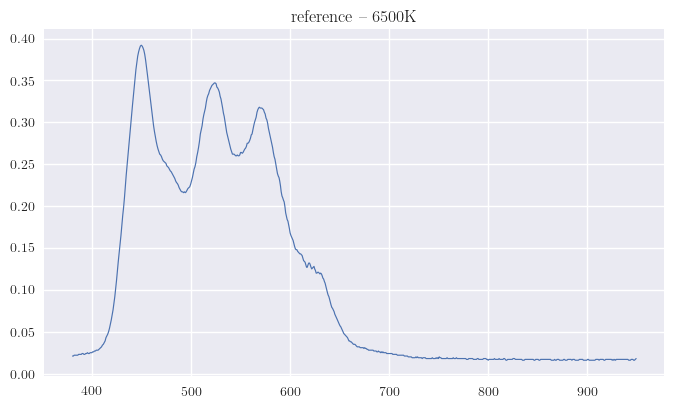

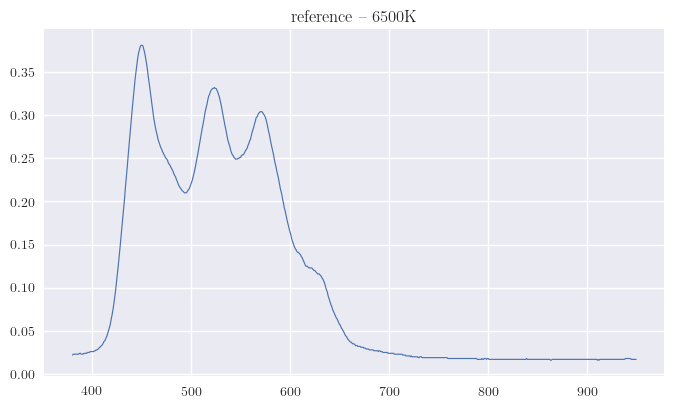

In [37]:
filenames = os.listdir()
count = 1
for f in filenames:
    if f.endswith('.txt'):
        data = np.genfromtxt(f, skip_header=4)
        wavelength, intensity = data.T
        title = f.split('_')[0]
        plottitle = title
        if title in ['reference', 'fluorescent']:
            plottitle = plottitle + r' -- 6500K'
        mp.plot(wavelength, intensity, lw=0.85)
        mp.title(plottitle)
        mp.savefig(title + str(count) + '.png', dpi=300, bbox_inches='tight')
        mp.show()
        count += 1